<a href="https://colab.research.google.com/github/MamadouBousso/Cours-Python/blob/main/Examendynamic_programming_problems_exo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen ALgorithmique et complexité
Vous completerez certaines cellules de code par les solutions que vous proposerez. 
Pour chaque probléme, vous proposerez une batterie de test que votres algorithme devra passer.




### Rappel Programmation dynamique
Objectifs d'apprentissage
* Comprendre la stratégie de conception d'algorithmes de programmation dynamique
* Comprendre les applications de la conception d'algorithmes de programmation dynamique
* Comprendre la récupération de solution à partir de tables de mémo
* Comprendre la mémorisation et comment construire des tables de mémo à partir de solutions récursives
* Comprendre comment encadrer les définitions récursives pour la programmation dynamique

### Exercice 1: Programmation dynamique, probléme de monnaie

On nous donne une liste de dénominations possibles $lst : [c_1, \ldots, c_k]$ et un montant $x$ pour lequel nous souhaitons rendre la monnaie.

Choisissez des nombres de pièces $n_1, \ldots, n_k$ de pièces de monnaie $c_1, \ldots, c_k$, respectivement de sorte que
   1. $n_1 c_1 + \ldots + n_k c_k = x$, c'est-à-dire  nous fournissons la monnaie _exacte_
   2. Le nombre de pièces $n_1 + \ldots + n_k$ doit être minimisé.

In [ ]:
## Creer une batterie  de 5 tests que votre algorithme devra passer

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
lst0 = [1, 4, 7, 9, 16, 43]
x0 = 33
lst1 = [1, 5, 10]
x1 = 50

#### 1. Identifier la sous-structure optimale

Pour identifier la sous-structure optimale, nous _échelonnons_ nos décisions. La décision à prendre est de savoir quelles pièces fournir comme monnaie.
Nous pouvons échelonner ces décisions comme suit :
  1. Engagez-vous à fournir une pièce maintenant. Disons pièce $c_i$.
  2. Il reste alors à rendre la monnaie de $x - c_i$ en utilisant le nombre minimum de pièces possible. En particulier, nous remarquons que le problème restant est une instance du problème original lui-même pour une plus petite quantité.
  3. Une fois (2) résolu, nous pouvons ajouter la pièce $c_i$ de (1) à l'ensemble des pièces qui résolvent (2).
  
Par conséquent, nous procédons à la formulation d'une fonction récursive pour le nombre minimum de pièces.

#### 2. Formuler une récurrence pour la valeur

La récurrence $\text{minPieces}(x)$ prend un montant à changer (elle a également un paramètre lst de la liste des pièces mais laissons-le de côté pour plus de lisibilité).

La définition récursive est

$$\text{minPieces}(x) = \ \min\ \left\{ \begin{array}{ll}
1 + \text{minPieces}(x - c_1) & \leftarrow\ \ \text{utiliser piece}\ c_1 \\
\vdots & \\
1 + \text{minPieces}(x - c_n) & \leftarrow\ \ \text{utiliser piece}\ c_n \\
\end{array}\right.$$

Les cas de base sont

  * $\text{minPieces}(0) = 0$
  * $\text{minPieces}(x) = \infty$ chaque fois que $x < 0$. __Q :__ Interprétez ce cas de base !

In [ ]:
import numpy as np
def minPieces(x,lstPieces):
  pass



##### Mémorisation

Vous avez déjà vu que la fonction récursive est d'un coût prohibitif. Si vous ajoutez une instruction `print(x)` à la première ligne du
fonction, vous comprendrez pourquoi. Mais attention à la taille de la sortie !

Pour résoudre ce problème, nous utilisons une table mémo $T$ avec des entrées $T[0], \ldots, T[x]$ où $x$ est le montant d'origine pour lequel nous souhaitons rendre la monnaie.
A chaque appel récursif, lorsque nous souhaitons connaître $\text{minPieces}(x - c_i)$, il sera simplement lu dans la table au lieu d'être calculé
nouveau à l'aide d'un appel récursif.

In [ ]:
def minPiecesMemo(x,lstPieces):
  pass

In [ ]:
# ATTENTION: Celle-là prend du temps
print(minPiecesMemo(42, lst0))

[0, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 3, 3, 4, 2, 3, 3, 4, 3, 4, 4, 3, 4, 3, 4]


#### Récupération de solutions

Nous avons calculé le nombre de pièces nécessaires, mais comment calculons-nous les pièces elles-mêmes ?

Nous augmentons le tableau des mémos non seulement pour enregistrer la valeur minimale, mais également quelle pièce nous a donné la valeur minimale.

Pour ce faire, nous créons une nouvelle table $S[0], ... , S[x]$.

Une fois que nous avons cela, la récupération de l'ensemble de pièces implique encore une autre boucle.

In [ ]:
def minPiecesMemo_sol(x,lstPieces):
  pass

In [ ]:
# ATTENTION: Celle-là prend du temps
print(minPiecesMemo_sol(42, lst0))

(4, [1, 9, 16, 16])


### Exercice 2: Recherche binaire illimitée
Étant donné une fonction croissante monotone f(x) sur des entiers positifs, trouver la valeur de x où f(x)=0 (ou signaler qu'il n'en existe pas).

**Input** : Une fonction monotone croissante f(x) sur des nombres entiers positifs (donnée sous la forme d'une boîte noire) qui prend à la fois des valeurs négatives et non négatives.

**Sortie** : Valeur de x où f(x)=0 ou "-1" si cette valeur n'existe pas.

Vous devez produire une batterie de 5 tests que votre algorithme doit passer.

**Indication:** Une fonction f(x) est monotone croissante si f(x+1) > f(x) pour tout entier x. Comme les valeurs f(x) forment un tableau trié, ce problème est équivalent à une recherche binaire avec la clé égale à 0. Mais l'indice supérieur de ce tableau est inconnu ! Ne vous inquiétez pas — essayez d'augmenter exponentiellement les valeurs de x : 2,4,8,16,… jusqu'à ce que vous trouviez x avec f(x)≥0. Ensuite, utilisez la valeur trouvée x comme index supérieur (et x/2 comme index inférieur) dans la recherche binaire.
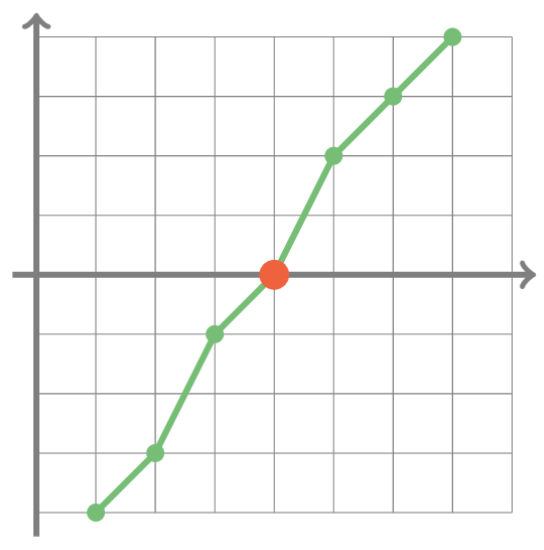

####**Exercice3: Séparer les entiers négatifs et positifs**
Étant donné un tableau d'entiers distincts, génère un tableau contenant les mêmes entiers où tous les nombres négatifs apparaissent en premier (dans l'ordre d'origine), suivis de tous les nombres positifs (dans l'ordre d'origine).

**Inputs:** un tableau d'entiers positifs et négatifs distincts.

**Outputs:** un tableau contenant les mêmes nombres entiers où tous les nombres négatifs apparaissent en premier (dans l'ordre d'origine), suivis de tous les nombres positifs (dans l'ordre d'origine)

Vous proposerez un algorithme naif et un algo efficient basé sur le divide and conquer. Vous calculerez les complexités des deux algo.
Vous devez aussi produire une batterie de tests.

**Exemple:**


Inputs: (3,−5,8,1,−4,−2,9,−7)


Output: (−5,−4,−2,−7,3,8,1,9) .

